In [1]:
# exec('''import urllib; exec(urllib.request.urlopen('https://raw.githubusercontent.com/NickGMV/visual-tools/main/visual-aids-jupyter8.txt').read())''')

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### 10 weeks of Python - Week 6

# Improved SKlearn regression

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Steps to complete an SKlearn regression in Python


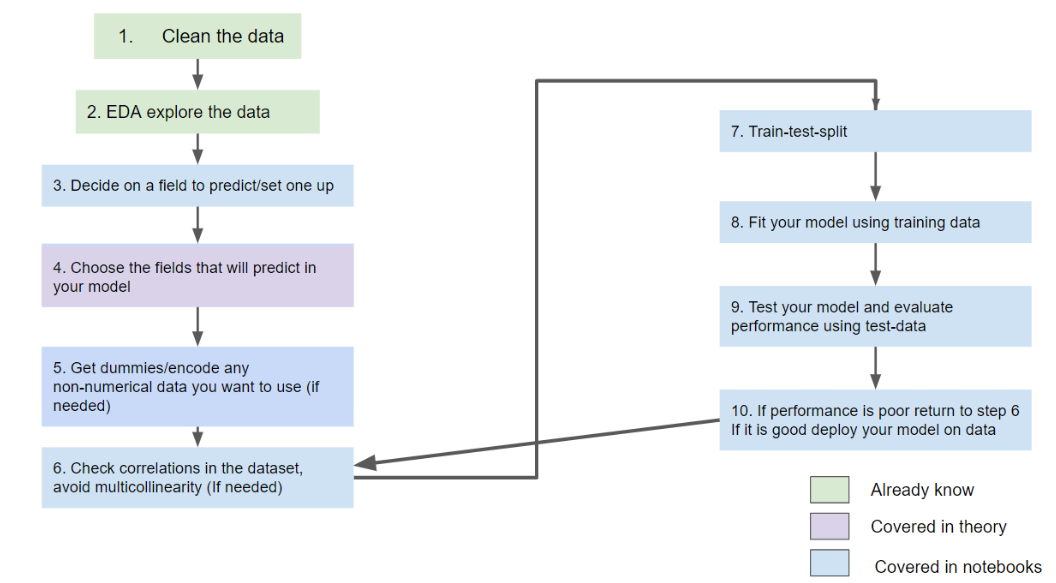

### A quick overview of the data

American health insurance is Expensive! There are number of factors that come in to play in calculating a persons insurance premium, this includes age,dependants,region and sex to name but a few.

This is an ideal place to bring in a model to predict continuous variables like linear regression.

In this case due to the large number of factors multiple linear regression is used in this notebook.

### Imports

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

## Our first rudimentary Regression

#### 1. Loading and cleaning

In [3]:
# Read the data and set the datetime as the index.
path = '../Assets/Data/bikeshare.csv'


bikes = pd.read_csv(path, index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Use the .rename() method to rename count to total
bikes.rename(columns={'count':'total_rentals','atemp':'average temperature'}, inplace=True)

In [5]:
# check datatypes
bikes.dtypes

season                   int64
holiday                  int64
workingday               int64
weather                  int64
temp                   float64
average temperature    float64
humidity                 int64
windspeed              float64
casual                   int64
registered               int64
total_rentals            int64
dtype: object

#### 2. Explore the data 

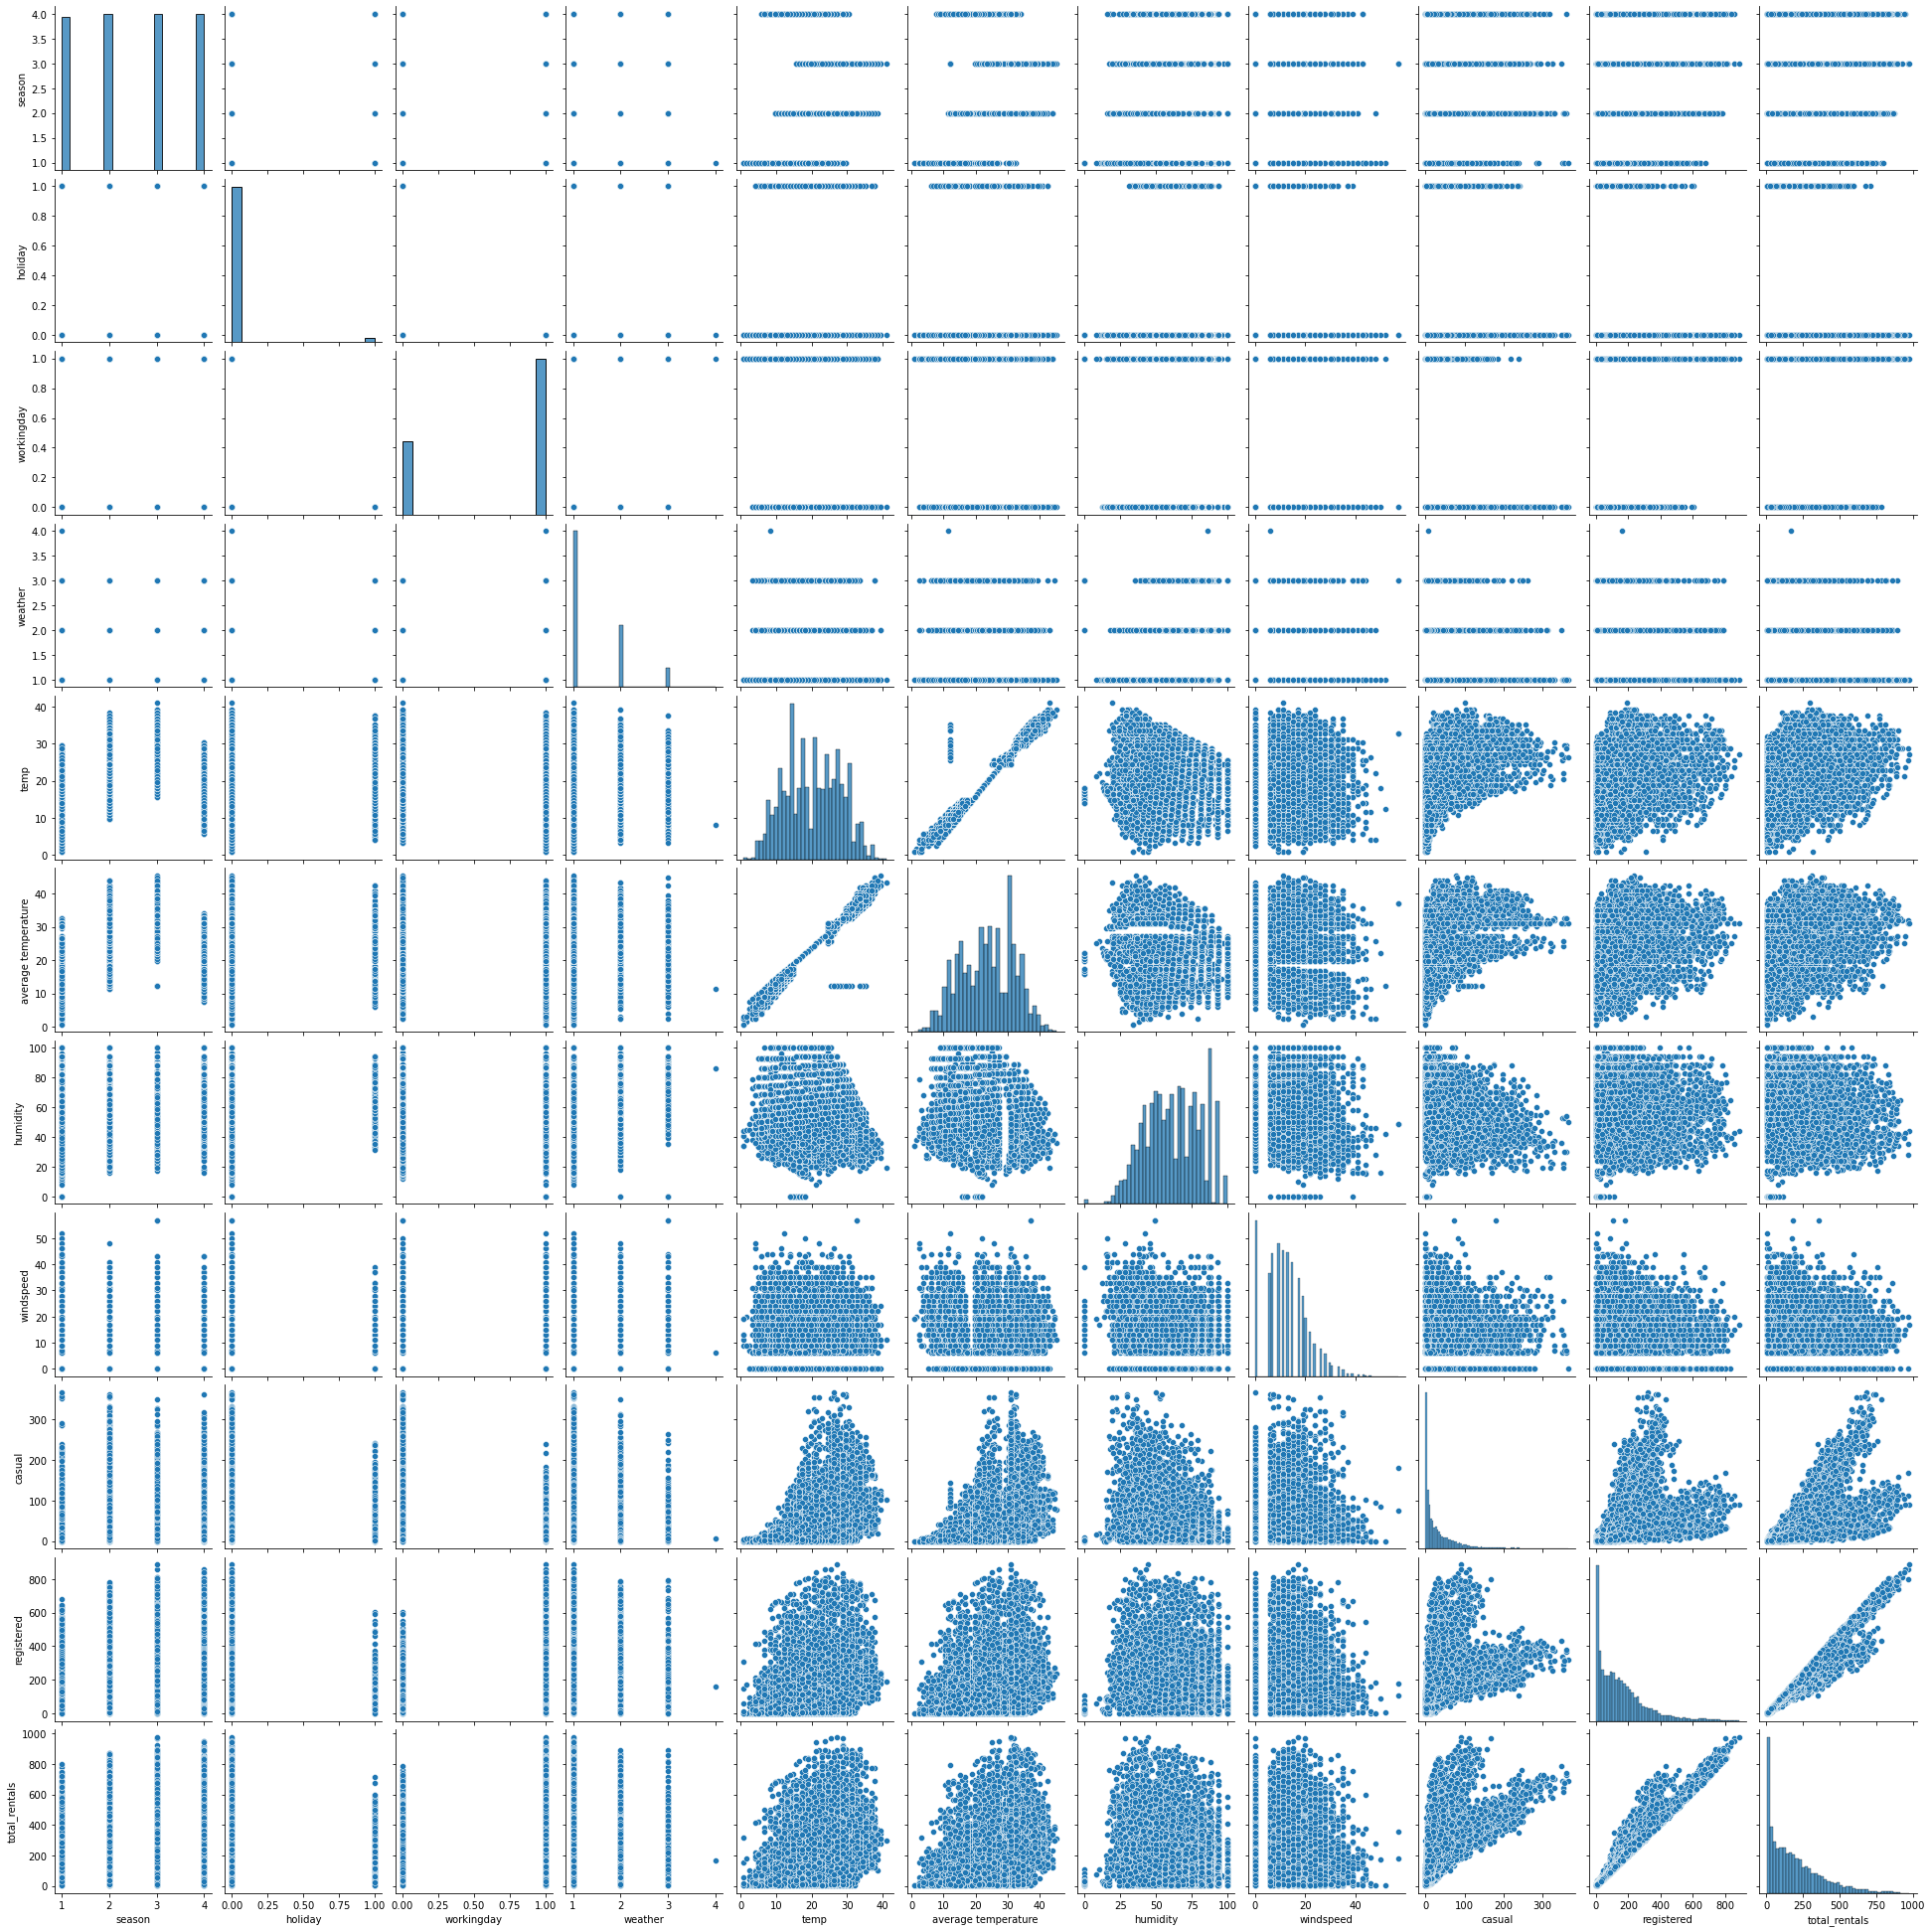

In [6]:
#A: Exploring relationship between total number of riders and temperature
# Pandas scatterplot

#pairplot can be used to see all the scatterplots for a set opf fields
sns.pairplot(bikes);

In [7]:
# creating a correlation table
bikes.corr()

,season,holiday,workingday,weather,temp,average temperature,humidity,windspeed,casual,registered,total_rentals
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
average temperature,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


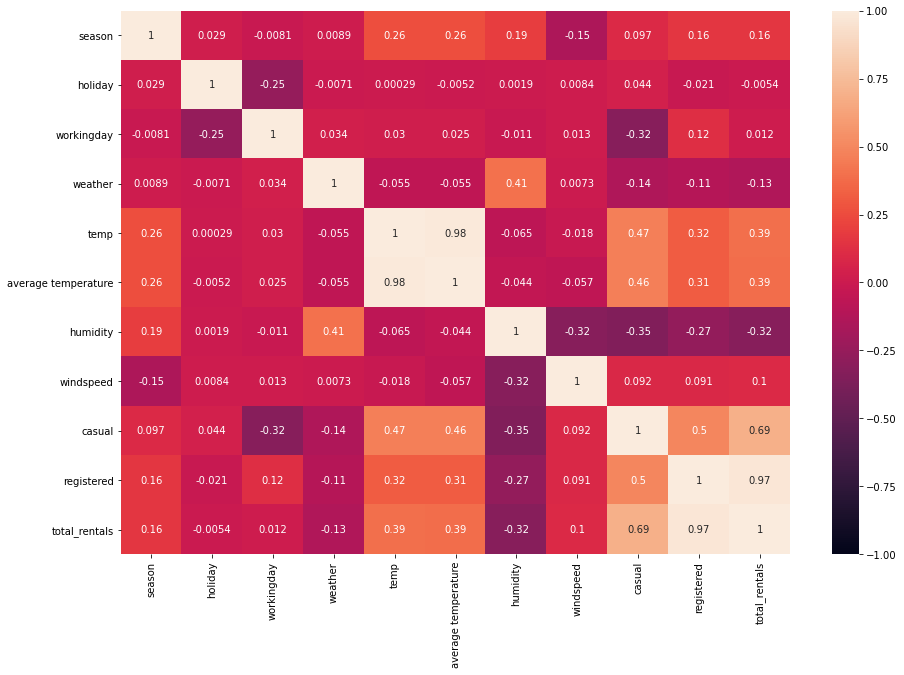

In [8]:
# show correlations in a heat map
plt.subplots(figsize=(15,10))
sns.heatmap(bikes.corr(), annot = True, vmin= -1, vmax = 1);

## .3 and .4 deciding the predictors and field to predict

 - We will predict the number of bike riders in any given day
 - In this first model we will only use 2 features humidity and temperature to predict
 - This is already a numerical value

In [9]:
# Create X and y.
# temperature appears to be a reasonably good predictor for the number of riders

feature_cols = ['temp','humidity'] # this would normally be step 6

X = bikes[feature_cols]
y = bikes.total_rentals

## 5. Dummies and encoding
- There is no need for dummies as the data is all numerical

## 6. Checking correlations (Multicolinearity)

Muticolinearity effects model training and can mask or amplify the effects of variables skewing the trained model.

To avoid it it is best to do a final spot check to ensure that your chosen predictrs are not colinear.

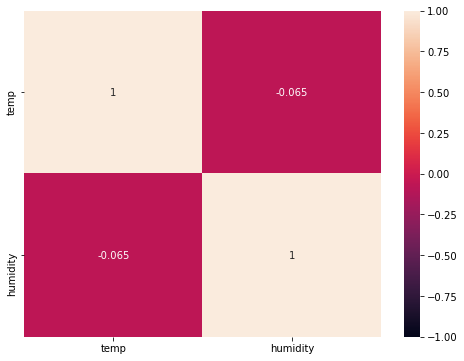

In [10]:
# We want to check that ur selected predictors are not colinear (correlated < 0.6)
plt.subplots(figsize=(8,6))
sns.heatmap(X.corr(), annot = True, vmin= -1, vmax = 1);

## 7. Complete train-test-split

In [11]:
from sklearn.model_selection import train_test_split

# Create a 70/30 train test split for the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

## 8. Setting up a first model 

- Fit using training data only

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.intercept_)
print(lr.coef_)

181.21131371379064
[ 8.73717079 -2.72745602]


In [13]:
# Now we can use this model to predict

pred = lr.predict(X_test)
pred

array([ 72.88328073, 243.40817789,  94.989873  , ...,  89.24801686,
       251.91675399, 228.02206586])

## 9. Evaluate Performance

Once a model is built we want to measure its success

In [14]:
from sklearn import metrics
import numpy as np

true = y_test
pred = lr.predict(X_test)

# take the mean of the size of each error
print('MAE:', metrics.mean_absolute_error(true, pred)) 

# take the mean of all the errors squared (punishes big errors much more severely)
print('MSE:', metrics.mean_squared_error(true, pred))

# A balance between MAE and MSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 118.76873090834502
MSE: 25374.101774564795
RMSE: 159.29250382414358


# 10. If needed select new predictors to improve performance

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Now you try
 Using your cleaned data set (or the practice set)
 
1. Evaluate our current model
2. See if there are any other predictors you think may be good to add
3. Add these to the model and retrain

In [15]:
# code here

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

# A simple Deployment

In [16]:
deploy = LinearRegression()
deploy.fit(X,y)

LinearRegression()

In [17]:
new_bike = pd.read_excel('../Assets/Data/bike_predict.xlsx')

In [18]:
new_bike.head()

,datetime,season,holiday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
1,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
3,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
4,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [19]:
# select same asmodel was traind on
new_predictors = ['temperature','humidity']

# create a new column in our other data set and predict
new_bike['predicted'] = deploy.predict(new_bike[new_predictors])

In [20]:
new_bike.head()

,datetime,season,holiday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count,predicted
0,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,64.717308
1,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,64.717308
2,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,43.771439
3,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,20.067811
4,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,64.717308


In [21]:
# Output our final predictions
# Follow the path to check out the outputs
new_bike.to_excel('../Assets/Data Outputs/bike_demo_predictions.xlsx')

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Now you try
 Using your cleaned data set (or the practice set)
 
1. Build a deployment version of yur model and use it on some data


In [22]:
# code here

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

#### For saving models and quick for deployment to other notebooks or softwares this is excellent further reading to get you started
https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">


### See you next time


<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

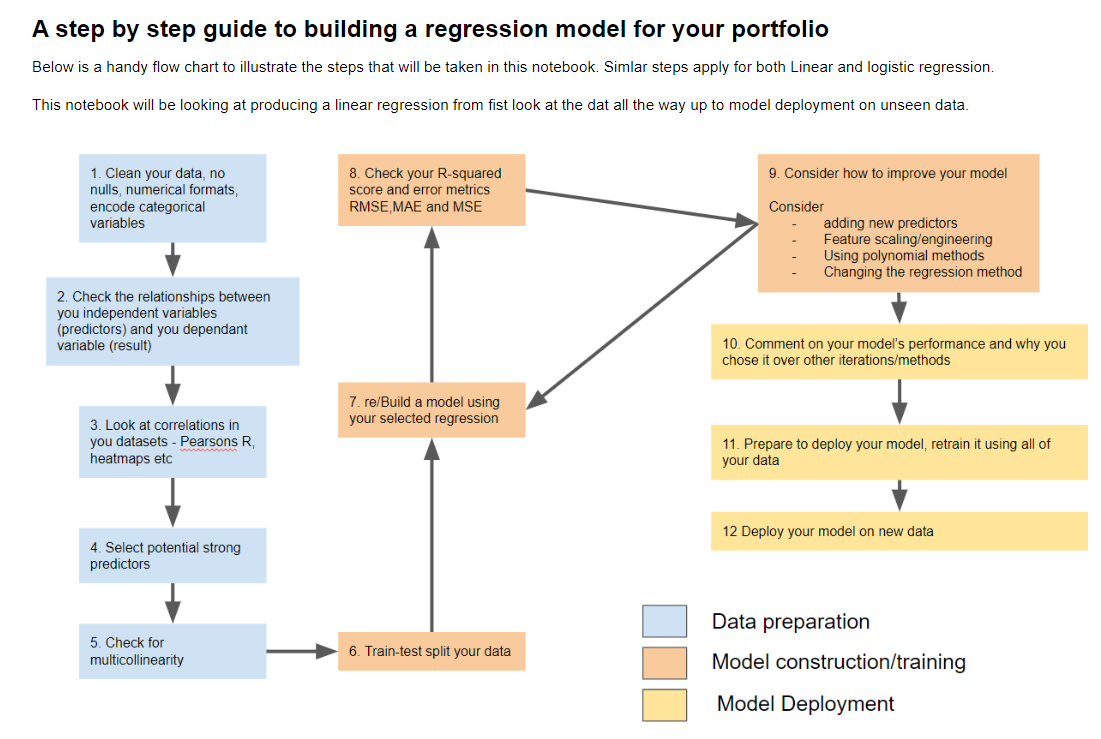